# Fashion MNIST: Simple Neural Network

The Fashion-MNIST dataset is a collection of 70,000 grayscale images of 10 different categories of clothing items. Each image is a 28x28 pixel square (784 pixels total). The images are labeled with an integer from 0-9, each corresponding to a specific clothing category.

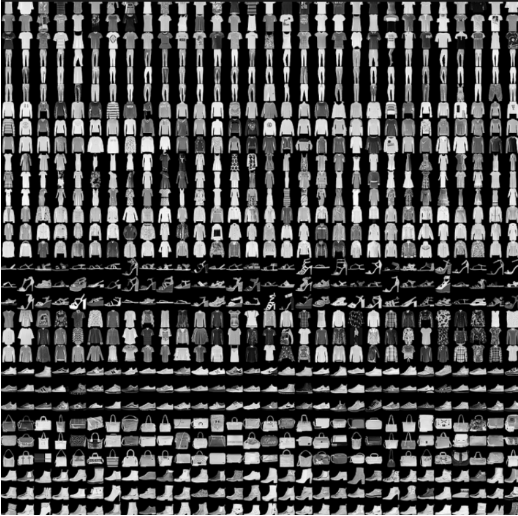

Here's a list of the labels and what clothing category they represent:

1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

The dataset is split into a training set of 60,000 images and a test set of 10,000 images.

This dataset is often used in machine learning and computer vision research, particularly as a beginner's dataset for image classification problems, for a few reasons:

1. **Size and Complexity**: The dataset is large enough to train a deep neural network, and the problem it represents is complex enough to be interesting and educational.
2. **Balance**: The dataset is balanced, meaning each category has the same number of images. This makes the evaluation of models more fair and the training process more stable.
3. **Accessibility**: It's very easy to download and use, with many machine learning libraries offering built-in functions to download and load the dataset.
4. **Benchmarking**: Because so many researchers use this dataset, it's easy to compare the performance of different models and algorithms.

The Fashion-MNIST dataset was created as a slightly more complex drop-in replacement for the original MNIST dataset, which was a collection of handwritten digits. This is because the MNIST dataset was considered to be too easy for modern machine learning models. Despite its simplicity, the Fashion-MNIST dataset is often the first step into the world of image classification and convolutional neural networks for many learners.


## The structure of Fashion MNIST data

The Fashion MNIST dataset, much like the original MNIST dataset, is structured in a way that's easy for a machine learning model to process. Each example in the dataset is a single piece of clothing, represented as a 28x28 array (or grid) of grayscale values, and a corresponding label, represented as a number.

1. **Images**: Each image is represented as a 28x28 array, which is a common format for image data. Each cell in the array represents one pixel in the image. The value in the cell represents the grayscale value of that pixel, with 0 being black and 255 being white. This 28x28 array can be flattened into a single row of 784 values (since 28*28 = 784), and it's often done this way when you feed the data into a machine learning model.
2. **Labels**: Each image has a corresponding label that is represented as a number from 0 to 9, with each number corresponding to a different type of clothing. Representing labels as numbers, as you mentioned, is a good practice because it avoids bias and makes the dataset universally understandable, regardless of language. Also, it's a format that is easy for a machine learning model to process.

When we feed these images and labels into a machine learning model, the model learns to associate the patterns in the 28x28 array with the corresponding label. Once the model is trained, it should be able to take a new 28x28 array (an image it hasn't seen before), and predict the correct label.

## Start Coding

This script is a complete process of training a simple neural network on the Fashion MNIST dataset using TensorFlow. Here's a breakdown of what each part of the code does:

Note: This code creates a simple feed-forward neural network. For image data, a Convolutional Neural Network (CNN) would generally perform better. This would involve adding Conv2D and MaxPooling2D layers to the model.

## Import necessary libraries:

TensorFlow is imported for building and training the model. Numpy is used for numerical operations and Matplotlib is used for data visualization.

In [ ]:
import tensorflow as tf

print(tf.__version__)

## Load the Fashion MNIST dataset:

The tf.keras.datasets.fashion_mnist function loads the Fashion MNIST dataset, which is divided into training and testing sets.

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

## Inspecting an image and its label:

The script then prints the pixel values of a single image (specified by the 'index' variable) and its label from the training set. It also visualizes this image using matplotlib.pyplot.

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

## Inspecting an image and its label:
The script then prints the pixel values of a single image (specified by the 'index' variable) and its label from the training set. It also visualizes this image using matplotlib.pyplot.

In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 2

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

## Normalize the data:

The pixel values of the images are normalized by dividing by 255 (the maximum value of a pixel intensity in a grayscale image). This helps the neural network learn more effectively.

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Build the model:

The model architecture is defined. This model is a simple feed-forward neural network (not a CNN), which includes:


1. An input layer (**`Flatten`**), which converts each 2D image into a 1D array.
2.   A hidden layer (**`Dense`**), which has 128 units and uses ReLU (Rectified Linear Unit) as the activation function. This is a simple function that allows the model to learn non-linear relationships in the data.
3. An output layer (**`Dense`**), which has 10 units (one for each class of clothing) and uses the softmax function as the activation function. This function converts the model's output into a probability distribution, so the output of each unit is a probability that the input image belongs to the corresponding class.

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## Compile the model:

The model is then compiled with the Adam optimizer and the cross entropy loss function, which are good defaults for a multi-class classification problem like this one. The model will also keep track of accuracy as a metric during training.

## Train the model:

The model is then trained on the training images and labels for 5 epochs, meaning it makes 5 passes over the entire dataset, adjusting its weights each time to minimize the loss function.

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

## Evaluate the model:

Finally, the model's performance is evaluated on the test images and labels. This gives an estimate of how well the model would perform on new images that it hasn't seen during training.

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

## Save the Model

In [ ]:
# Save the model
model.save('my_model.keras', save_format='tf')

## Softmax Function

This part of the code is showing how a softmax activation function works. Here's a simple breakdown:

1. **Declare Sample Inputs**: It first creates a numpy array **`inputs`** containing four float numbers. These numbers could represent any kind of input values, but in the context of neural networks, you can think of them as the output from previous neurons before they have been normalized.
2. **Convert to Tensor**: It then converts the numpy array into a TensorFlow tensor using **`tf.convert_to_tensor`**. A tensor is a generalization of matrices to multiple dimensions, and it's the primary data structure used in TensorFlow.
3. **Apply Softmax**: The tensor is then passed through a softmax activation function using **`tf.keras.activations.softmax`**. The softmax function is often used in the final layer of a neural network for multi-class classification. It turns the input numbers into probabilities that sum to 1. This means each number in the output represents the predicted probability of a class in a multi-class classification problem.
4. **Print the Sum of Outputs**: The sum of these output probabilities is then printed. Since softmax returns probabilities and all probabilities sum up to 1, the sum here should be close to 1.
5. **Get the Class with Highest Probability**: Finally, the code finds the class (index) with the highest probability using **`np.argmax`**. The **`argmax`** function returns the index of the maximum value in an array. In the context of neural network predictions, the index represents the predicted class.

So, this piece of code is demonstrating how you can convert raw outputs from a model into probabilities that indicate the model's prediction for each class, and then determine which class the model predicts with the highest probability.

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

## Use pre-trained models to make predictions

This code uses a pre-trained model to predict the classes of the test images from the Fashion MNIST dataset, and then prints the model's prediction and the actual label for a specific image. Here's what each part of the code does:

1. **Import necessary libraries**: TensorFlow is imported for building and training models. Numpy is used for numerical operations.
2. **Load the Fashion MNIST dataset**: The **`tf.keras.datasets.fashion_mnist`** function loads the Fashion MNIST dataset, which is split into training and testing sets.
3. **Load a Pre-Trained Model**: The **`tf.keras.models.load_model`** function loads a pre-trained model from a file. This means that you don't have to train a model yourself; you can use a model that someone else has trained and saved.
4. **Make Predictions**: The **`model.predict`** function uses the pre-trained model to make predictions on the test images. The output, **`classifications`**, is a 2D array. For each test image, it contains an array of 10 numbers (because there are 10 classes of clothing in the dataset). These numbers are the model's "confidence" that the image belongs to each class.
5. **Print Model Output for a Specific Image**: It then prints the model's output for the fourth test image (since Python uses 0-based indexing, **`classifications[3]`** is the output for the fourth image).
6. **Find the Predicted Class**: It finds the index of the maximum value in the model's output array for the fourth image, using **`np.argmax`**. This is the model's predicted class for that image.
7. **Print the Actual Label**: Finally, it prints the actual label for the fourth image, which is the true class of the image.

So, in simple terms, this code loads a set of images of different types of clothing, uses a pre-trained model to guess the type of each piece of clothing, and then checks the model's guess for the fourth image against the truth.

In [ ]:
import tensorflow as tf
import numpy as np

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

new_model = tf.keras.models.load_model('my_model.keras')

classifications = new_model.predict(test_images)

print("Model Output " +str(classifications[3]))
print("Index of the max value of model output array " +str(np.argmax(classifications[3])))
print("Read label " + str(test_labels[3]))

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

## **What's the impact?**

## **Increase to hidden layer Neurons -- What's the impact?**

Increasing the number of neurons in a layer of a neural network allows the model to learn more complex patterns. However, it also increases the amount of computation required, which means it takes longer to train the model. More neurons can improve the model's accuracy up to a point, but too many can lead to overfitting, where the model learns the training data too closely and performs poorly on new, unseen data.

## Removing the Flatten() layer **-- What's the impact?**

**`Flatten()`** is essential here because it transforms the data into the format that the rest of the network can work with. If you remove it, the data stays in the wrong format, and the network can't train.

## Change the number of neurons in the final layer **-- What's the impact?**

If you change the number of neurons in the final layer to a number different from the number of classes in your dataset, the network won't work as intended.

## Adding another layer in the neural network **-- What's the impact?**

Adding another layer in the neural network can potentially improve the model's accuracy, as it can learn more complex representations of the data. However, it could also lead to overfitting where the model performs well on training data but poorly on new data. Additionally, more layers increase the computational cost and training time. Finding the optimal number of layers often involves trial and error, balancing accuracy and computational efficiency.

## Training for more or less epochs **-- What's the impact?**

Training for more epochs means that the model has more iterations to learn the patterns in the data, potentially improving accuracy. However, if you train for too many epochs, the model might start overfitting, where it learns the training data too well and performs poorly on unseen data. Conversely, if you train for too few epochs, the model might underfit, where it doesn't learn the data well enough, leading to lower accuracy. It's about finding a balance.

## Removing data normalisation **-- What's the impact?**

Normalization helps to scale input data into a similar range, which aids the model's learning process. If you remove normalization, inputs with larger ranges could disproportionately affect the model's learning, making training more difficult and leading to worse performance. Different results are due to these different scales of inputs, causing different learning dynamics during training.